In [6]:
import sys
sys.path.append("../")

from src.matrix_completion_methods import MatrixFactorisation
from src.preprocessing import DataPreprocessor
import numpy as np
from src.metrics import rmse, accuracy_exact
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:

path1 = '../logs/algo=gd__k=1__lambda_reg=0p01__learning_rate_I=0p01__learning_rate_U=0p01__mu_reg=0p1__n_iter=100__seed=42.csv'
path2 = '../logs/algo=gd__k=1__lambda_reg=0p01__learning_rate_I=0p01__learning_rate_U=0p01__mu_reg=0p1__n_iter=50__seed=42.csv'
path3 = '../outputs/normalisation/algo=als__k=1__lambda_reg=0p1__mu_reg=0p1__n_iter=100__seed=42.csv'
path4 = '../outputs/normalisation/algo=als__k=1__lambda_reg=0p01__mu_reg=0p01__n_iter=100__seed=42.csv'
path5 = '../outputs/normalisation/algo=als__k=1__lambda_reg=0p1__mu_reg=0p01__n_iter=100__seed=42.csv'
path6 = '../outputs/normalisation/algo=als__k=1__lambda_reg=0p01__mu_reg=0p1__n_iter=100__seed=42.csv'

In [ ]:
# (lambda, mu) varies
path1 = '../outputs/try_normalisation/algo=als__k=1__lambda_reg=0p1__mu_reg=0p1__n_iter=100__seed=42.csv'
path2 = '../outputs/try_normalisation/algo=als__k=1__lambda_reg=0p01__mu_reg=0p01__n_iter=100__seed=42.csv'
path3 = '../outputs/try_normalisation/algo=als__k=1__lambda_reg=0p1__mu_reg=0p01__n_iter=100__seed=42.csv'
path4 = '../outputs/try_normalisation/algo=als__k=1__lambda_reg=0p01__mu_reg=0p1__n_iter=100__seed=42.csv'
path1p = '../outputs/try_normalisation/algo=als__k=1__lambda_reg=0p1__mu_reg=0p1__n_iter=100__seed=42.csv'
path2p = '../outputs/try_normalisation/algo=als__k=1__lambda_reg=0p01__mu_reg=0p01__n_iter=100__seed=42.csv'
path3p = '../outputs/normalisation/algo=als__k=1__lambda_reg=0p1__mu_reg=0p01__n_iter=100__seed=42.csv'
path4p = '../outputs/normalisation/algo=als__k=1__lambda_reg=0p01__mu_reg=0p1__n_iter=100__seed=42.csv'

In [28]:
# k varies
path1 = '../outputs/no_normalisation/algo=gd__k=1__lambda_reg=10__learning_rate_I=0p001__learning_rate_U=0p001__mu_reg=10__n_iter=100__seed=42.csv'
path2 = '../outputs/no_normalisation/algo=gd__k=2__lambda_reg=10__learning_rate_I=0p001__learning_rate_U=0p001__mu_reg=10__n_iter=100__seed=42.csv'
path3 = '../outputs/no_normalisation/algo=gd__k=5__lambda_reg=10__learning_rate_I=0p001__learning_rate_U=0p001__mu_reg=10__n_iter=100__seed=42.csv'
path4 = '../outputs/no_normalisation/algo=gd__k=10__lambda_reg=10__learning_rate_I=0p001__learning_rate_U=0p001__mu_reg=10__n_iter=100__seed=42.csv'
path5 = '../outputs/no_normalisation/algo=gd__k=20__lambda_reg=10__learning_rate_I=0p001__learning_rate_U=0p001__mu_reg=10__n_iter=100__seed=42.csv'
path6 = '../outputs/no_normalisation/algo=gd__k=50__lambda_reg=10__learning_rate_I=0p001__learning_rate_U=0p001__mu_reg=10__n_iter=100__seed=42.csv'

In [26]:
# k varies
path1 = '../outputs/try_normalisation/algo=gd__k=1__lambda_reg=0p1__learning_rate_I=0p01__learning_rate_U=0p01__mu_reg=0p1__n_iter=100__seed=42.csv'
path2 = '../outputs/try_normalisation/algo=gd__k=2__lambda_reg=0p1__learning_rate_I=0p01__learning_rate_U=0p01__mu_reg=0p1__n_iter=100__seed=42.csv'
path3 = '../outputs/try_normalisation/algo=gd__k=5__lambda_reg=0p1__learning_rate_I=0p01__learning_rate_U=0p01__mu_reg=0p1__n_iter=100__seed=42.csv'
path4 = '../outputs/try_normalisation/algo=gd__k=10__lambda_reg=0p1__learning_rate_I=0p01__learning_rate_U=0p01__mu_reg=0p1__n_iter=100__seed=42.csv'
path5 = '../outputs/try_normalisation/algo=gd__k=20__lambda_reg=0p1__learning_rate_I=0p01__learning_rate_U=0p01__mu_reg=0p1__n_iter=100__seed=42.csv'
path6 = '../outputs/try_normalisation/algo=gd__k=50__lambda_reg=0p1__learning_rate_I=0p01__learning_rate_U=0p01__mu_reg=0p1__n_iter=100__seed=42.csv'

/var/folders/b9/7qf_s3v54653803y503gdv2c0000gr/T/ipykernel_30924/1985802587.py:17: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap("rainbow", len(csv_files))


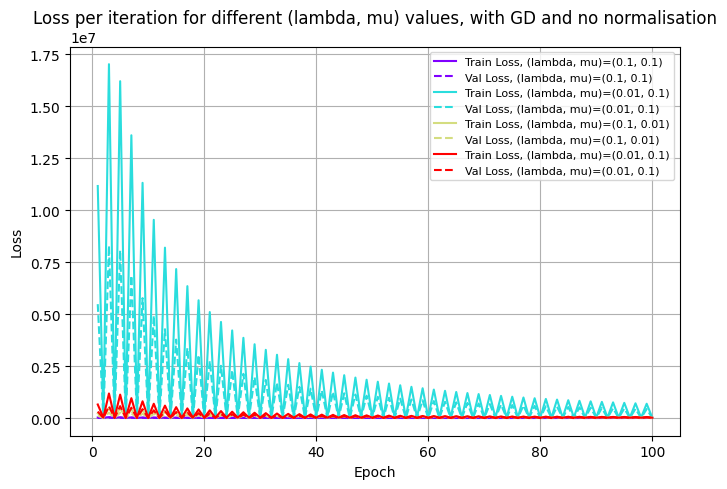

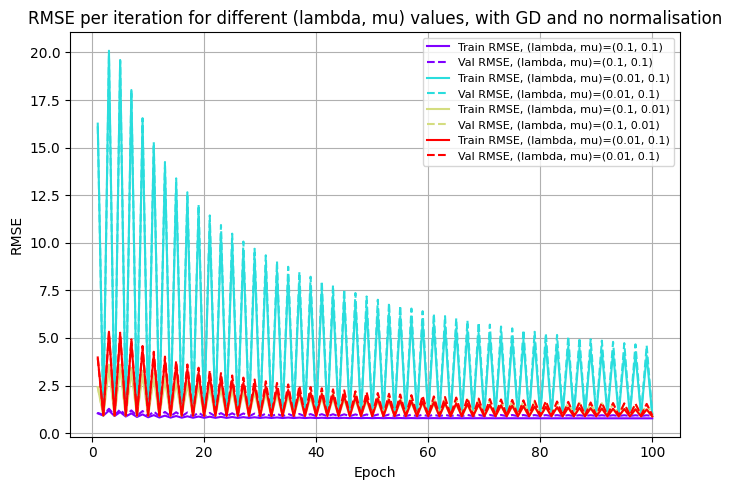

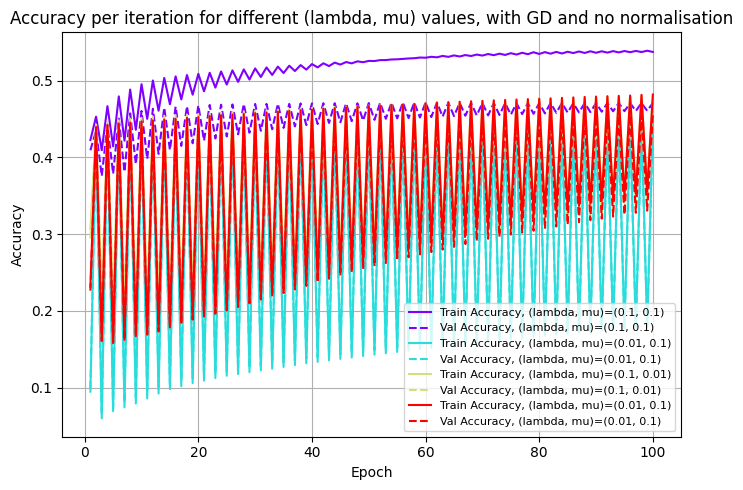

In [ ]:


# Manually list CSV files and corresponding hyperparameter values
csv_files = [
    path1,
    path2,
    path3,
    path4,
    # path5,
    # path6
]

max_epoch = 100  # Set to an integer to limit the x-axis

cmap = plt.cm.get_cmap("rainbow", len(csv_files))
colors = [cmap(i) for i in range(len(csv_files))]

# hp_name = "k"  # Name of the hyperparameter being varied
# hyperparams = [1, 2, 5, 10, 20, 50]  # e.g., the k value for each file
hp_name = "(lambda, mu)"  # Name of the hyperparameter being varied
hyperparams = [(0.1, 0.1), (0.01, 0.1), (0.1, 0.01), (0.01, 0.1)]  # e.g., the (lambda, mu) value for each file


metrics = [("Loss", "train_loss", "val_loss"),
           ("RMSE", "train_rmse", "val_rmse"),
           ("Accuracy", "train_acc", "val_acc")]

# colors = plt.cm.viridis(np.linspace(0, 1, len(csv_files)))

for metric_name, train_col, val_col in metrics:
    plt.figure(figsize=(7,5))
    
    for file_path, hp_value, color in zip(csv_files, hyperparams, colors):
        df = pd.read_csv(file_path)
        df_mean = df.groupby("epoch").mean(numeric_only=True).reset_index()

        if max_epoch is not None:
            df_mean = df_mean[df_mean["epoch"] <= max_epoch]
        
        # Train: solid line
        plt.plot(df_mean["epoch"], df_mean[train_col], label=f"Train {metric_name}, {hp_name}={hp_value}", color=color, linestyle='-')
        # Val: dashed line
        plt.plot(df_mean["epoch"], df_mean[val_col], label=f"Val {metric_name}, {hp_name}={hp_value}", color=color, linestyle='--')
    
    plt.xlabel("Epoch")
    plt.ylabel(metric_name)
    plt.title(f"{metric_name} per iteration for different {hp_name} values, with GD and no normalisation")
    plt.legend(fontsize=8)
    plt.grid(True)
    plt.tight_layout()
    plt.show()


In [35]:
# k varies
path1 = '../outputs/normalisation/algo=gd__k=1__lambda_reg=0p01__learning_rate_I=0p01__learning_rate_U=0p01__mu_reg=0p01__n_iter=100__seed=42.csv'
path2 = '../outputs/normalisation/algo=gd__k=2__lambda_reg=0p01__learning_rate_I=0p01__learning_rate_U=0p01__mu_reg=0p01__n_iter=100__seed=42.csv'
path3 = '../outputs/normalisation/algo=gd__k=5__lambda_reg=0p01__learning_rate_I=0p01__learning_rate_U=0p01__mu_reg=0p01__n_iter=100__seed=42.csv'
path4 = '../outputs/normalisation/algo=gd__k=10__lambda_reg=0p01__learning_rate_I=0p01__learning_rate_U=0p01__mu_reg=0p01__n_iter=100__seed=42.csv'
path5 = '../outputs/normalisation/algo=gd__k=20__lambda_reg=0p01__learning_rate_I=0p01__learning_rate_U=0p01__mu_reg=0p01__n_iter=100__seed=42.csv'
path6 = '../outputs/normalisation/algo=gd__k=50__lambda_reg=0p01__learning_rate_I=0p01__learning_rate_U=0p01__mu_reg=0p01__n_iter=100__seed=42.csv'

In [43]:
# k varies
path1 = '../outputs/normalisation/algo=gd__k=1__lambda_reg=0p01__learning_rate_I=0p01__learning_rate_U=0p01__mu_reg=0p01__n_iter=100__seed=42.csv'
path2 = '../outputs/normalisation/algo=gd__k=1__lambda_reg=0p01__learning_rate_I=0p01__learning_rate_U=0p005__mu_reg=0p01__n_iter=100__seed=42.csv'
path3 = '../outputs/normalisation/algo=gd__k=1__lambda_reg=0p01__learning_rate_I=0p005__learning_rate_U=0p01__mu_reg=0p01__n_iter=100__seed=42.csv'
path4 = '../outputs/normalisation/algo=gd__k=1__lambda_reg=0p01__learning_rate_I=0p005__learning_rate_U=0p005__mu_reg=0p01__n_iter=100__seed=42.csv'
# path5 = '../outputs/normalisation/algo=gd__k=1__lambda_reg=0p01__learning_rate_I=0p01__learning_rate_U=0p01__mu_reg=0p01__n_iter=100__seed=42.csv'
# path6 = '../outputs/normalisation/algo=gd__k=1__lambda_reg=0p01__learning_rate_I=0p01__learning_rate_U=0p01__mu_reg=0p01__n_iter=100__seed=42.csv'

/var/folders/b9/7qf_s3v54653803y503gdv2c0000gr/T/ipykernel_30924/313949320.py:17: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap("rainbow", len(csv_files))


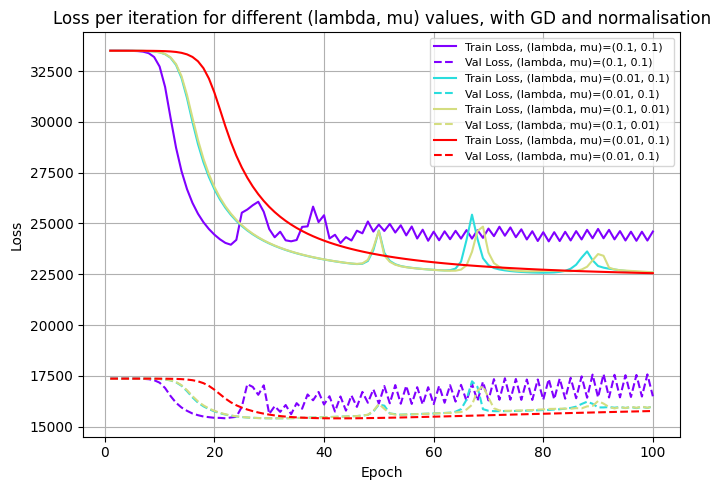

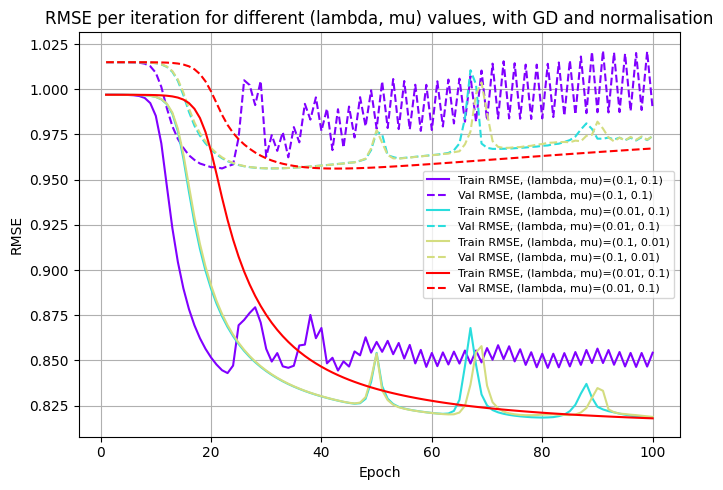

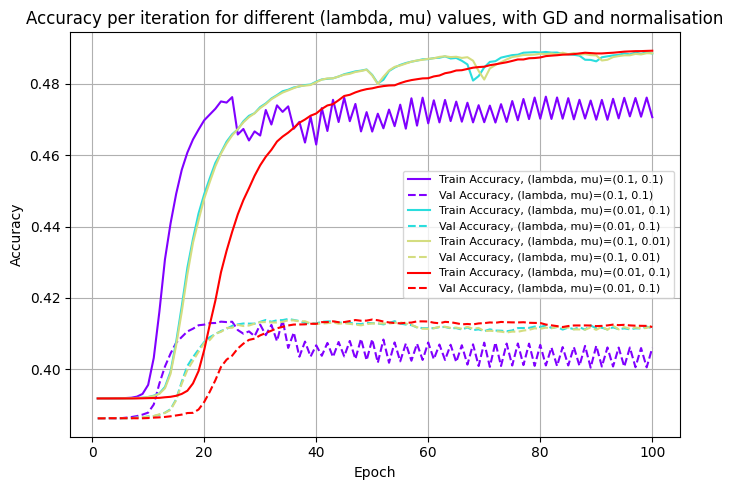

In [ ]:
# Manually list CSV files and corresponding hyperparameter values
csv_files = [
    path1,
    path2,
    path3,
    path4,
    # path5,
    # path6
]

max_epoch = 100  # Set to an integer to limit the x-axis

cmap = plt.cm.get_cmap("rainbow", len(csv_files))
colors = [cmap(i) for i in range(len(csv_files))]

# hp_name = "k"  # Name of the hyperparameter being varied
# hyperparams = [1, 2, 5, 10, 20, 50]  # e.g., the k value for each file
hp_name = "(lambda, mu)"  # Name of the hyperparameter being varied
hyperparams = [(0.1, 0.1), (0.01, 0.1), (0.1, 0.01), (0.01, 0.1)]  # e.g., the (lambda, mu) value for each file


metrics = [("Loss", "train_loss", "val_loss"),
           ("RMSE", "train_rmse", "val_rmse"),
           ("Accuracy", "train_acc", "val_acc")]

# colors = plt.cm.viridis(np.linspace(0, 1, len(csv_files)))

for metric_name, train_col, val_col in metrics:
    plt.figure(figsize=(7,5))
    
    for file_path, hp_value, color in zip(csv_files, hyperparams, colors):
        df = pd.read_csv(file_path)
        df_mean = df.groupby("epoch").mean(numeric_only=True).reset_index()

        if max_epoch is not None:
            df_mean = df_mean[df_mean["epoch"] <= max_epoch]
        
        # Train: solid line
        plt.plot(df_mean["epoch"], df_mean[train_col], label=f"Train {metric_name}, {hp_name}={hp_value}", color=color, linestyle='-')
        # Val: dashed line
        plt.plot(df_mean["epoch"], df_mean[val_col], label=f"Val {metric_name}, {hp_name}={hp_value}", color=color, linestyle='--')
    
    plt.xlabel("Epoch")
    plt.ylabel(metric_name)
    plt.title(f"{metric_name} per iteration for different {hp_name} values, with GD and normalisation")
    plt.legend(fontsize=8)
    plt.grid(True)
    plt.tight_layout()
    plt.show()


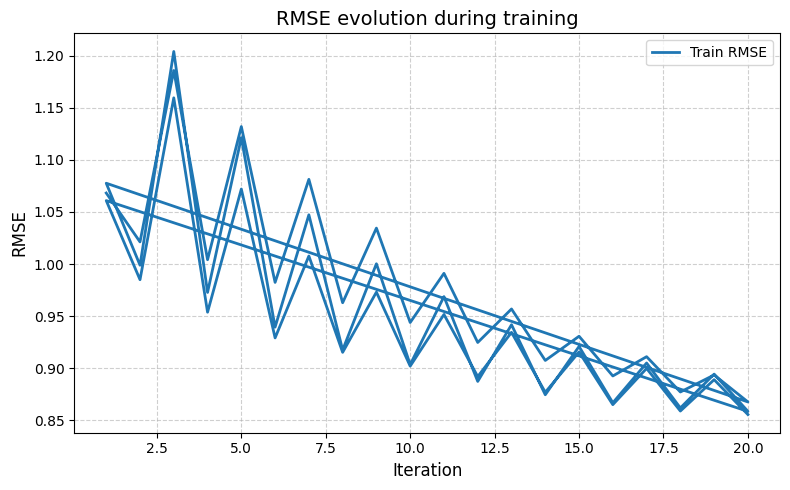

In [12]:
plt.figure(figsize=(8, 5))
plt.plot(df_won["epoch"], df_won["train_rmse"], label="Train RMSE", linewidth=2)
if "valid_rmse" in df_won and df_won["valid_rmse"].notnull().any():
    plt.plot(df_won["epoch"], df_won["valid_rmse"], label="Validation RMSE", linewidth=2, linestyle="--")

plt.xlabel("Iteration", fontsize=12)
plt.ylabel("RMSE", fontsize=12)
plt.title("RMSE evolution during training", fontsize=14)
plt.legend()
plt.grid(True, linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()

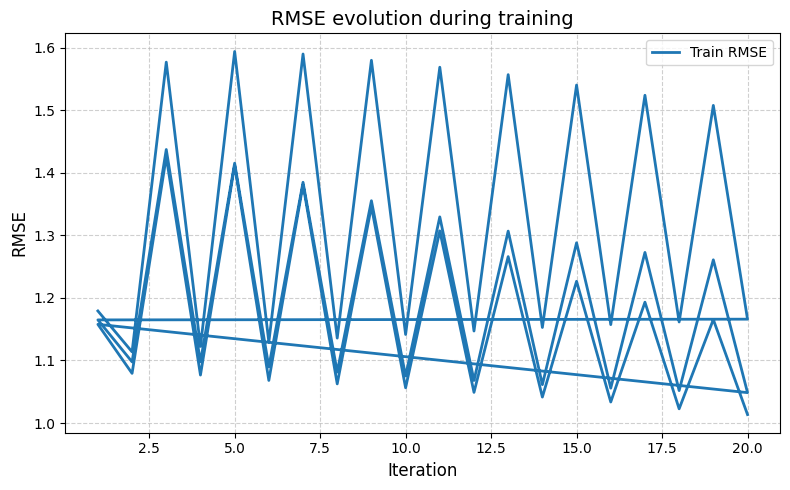

In [13]:
plt.figure(figsize=(8, 5))
plt.plot(df_wn["epoch"], df_wn["train_rmse"], label="Train RMSE", linewidth=2)
if "valid_rmse" in df_wn and df_wn["valid_rmse"].notnull().any():
    plt.plot(df_wn["epoch"], df_wn["valid_rmse"], label="Validation RMSE", linewidth=2, linestyle="--")

plt.xlabel("Iteration", fontsize=12)
plt.ylabel("RMSE", fontsize=12)
plt.title("RMSE evolution during training", fontsize=14)
plt.legend()
plt.grid(True, linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()

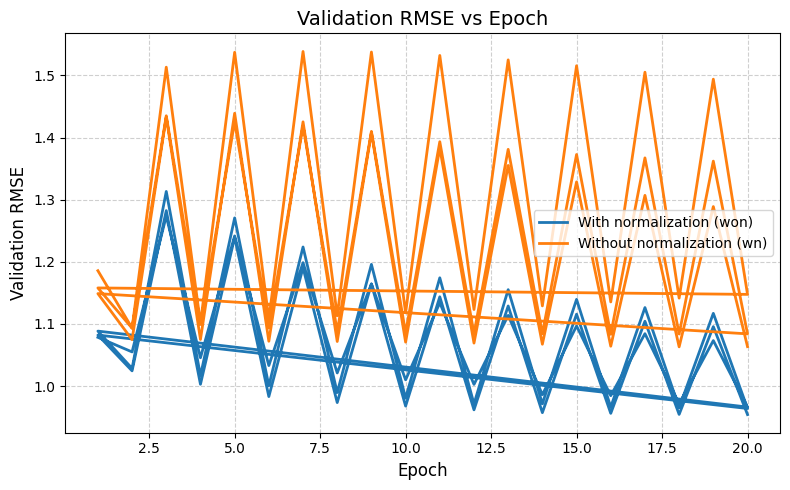

In [14]:
# df_won = pd.read_csv('../outputs/hist_k_100_n_300_init_user_mean_algo_gd_lambda_1_mu_1_lr_0.001_won.csv')
# df_wn = pd.read_csv('../outputs/hist_k_100_n_300_init_user_mean_algo_gd_lambda_1_mu_1_lr_0.001_wn.csv')

# Tracer les courbes
plt.figure(figsize=(8, 5))
plt.plot(df_won["epoch"], df_won["val_rmse"], label="With normalization (won)", linewidth=2)
plt.plot(df_wn["epoch"],  df_wn["val_rmse"],  label="Without normalization (wn)", linewidth=2)

# Mise en forme du graphe
plt.xlabel("Epoch", fontsize=12)
plt.ylabel("Validation RMSE", fontsize=12)
plt.title("Validation RMSE vs Epoch", fontsize=14)
plt.legend()
plt.grid(True, linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()

In [9]:
ratings_train = np.load("../data/ratings_train.npy")
ratings_test = np.load('../data/ratings_test.npy')

In [ ]:
historic = []
for n_iter in range(0, 1000, 20): 
    # Parameters
    kwargs={
        "fitting_algorithm": "gd",
        "k": 20,
        "n_iter": n_iter,
    }

    # Preprocessing
    data_preprocessor =  DataPreprocessor()
    train_table_normalized = data_preprocessor.normalize_by_user(matrix=ratings_train)

    # Train fit
    method = MatrixFactorisation(**kwargs)
    method.fit(initial_matrix=train_table_normalized)
    ratings_pred = method.complete()

    # Postprocessing
    ratings_pred = data_preprocessor.denormalize_by_user(
            matrix_standardized=ratings_pred)

    train_rmse = rmse(pred_matrix=ratings_pred, true_matrix=ratings_train)
    train_acc = accuracy_exact(pred_matrix=ratings_pred, true_matrix=ratings_train)
    print(f"Train RMSE: {train_rmse:.4f} | Train Accuracy : {train_acc*100:.2f}%")

    test_rmse = rmse(pred_matrix=ratings_pred, true_matrix=ratings_test)
    test_acc = accuracy_exact(pred_matrix=ratings_pred, true_matrix=ratings_test)
    print(f"Test RMSE: {test_rmse:.4f} | Test Accuracy : {test_acc*100:.2f}%")

    historic.append({
        'k' : n_iter,
        'train_rmse': train_rmse,
        'train_acc': train_acc,
        'test_rmse': test_rmse,
        'test_acc': test_acc
    })

In [7]:
historic = []
for k in range(0, 210, 10): 
    # Parameters
    kwargs={
        "fitting_algorithm": "gd",
        "k": k,
        "n_iter": 100,
        "lambda_reg": 0,
        "mu_reg": 0,
    }

    # Preprocessing
    data_preprocessor =  DataPreprocessor()
    train_table_normalized = data_preprocessor.normalize_by_user(matrix=ratings_train)

    # Train fit
    method = MatrixFactorisation(**kwargs)
    method.fit(initial_matrix=train_table_normalized)
    ratings_pred = method.complete()

    # Postprocessing
    ratings_pred = data_preprocessor.denormalize_by_user(
            matrix_standardized=ratings_pred)

    train_rmse = rmse(pred_matrix=ratings_pred, true_matrix=ratings_train)
    train_acc = accuracy_exact(pred_matrix=ratings_pred, true_matrix=ratings_train)
    print(f"Train RMSE: {train_rmse:.4f} | Train Accuracy : {train_acc*100:.2f}%")

    test_rmse = rmse(pred_matrix=ratings_pred, true_matrix=ratings_test)
    test_acc = accuracy_exact(pred_matrix=ratings_pred, true_matrix=ratings_test)
    print(f"Test RMSE: {test_rmse:.4f} | Test Accuracy : {test_acc*100:.2f}%")

    historic.append({
        'k' : k,
        'train_rmse': train_rmse,
        'train_acc': train_acc,
        'test_rmse': test_rmse,
        'test_acc': test_acc
    })

AttributeError: 'DataPreprocessor' object has no attribute 'normalize_by_user'

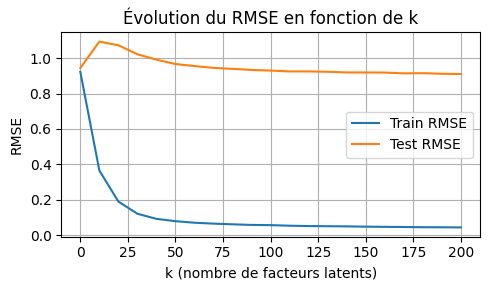

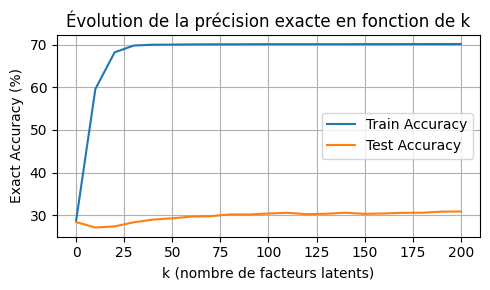

In [ ]:
# Extraction des données
ks = [h['k'] for h in historic]
train_rmse = [h['train_rmse'] for h in historic]
test_rmse = [h['test_rmse'] for h in historic]
train_acc = [h['train_acc'] for h in historic]
test_acc = [h['test_acc'] for h in historic]

# --- Plot 1 : RMSE ---
plt.figure(figsize=(5, 3))
plt.plot(ks, train_rmse, label='Train RMSE')
plt.plot(ks, test_rmse, label='Test RMSE')
plt.xlabel('k (nombre de facteurs latents)')
plt.ylabel('RMSE')
plt.title('Évolution du RMSE en fonction de k')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# --- Plot 2 : Accuracy ---
plt.figure(figsize=(5, 3))
plt.plot(ks, [a*100 for a in train_acc],label='Train Accuracy')
plt.plot(ks, [a*100 for a in test_acc], label='Test Accuracy')
plt.xlabel('k (nombre de facteurs latents)')
plt.ylabel('Exact Accuracy (%)')
plt.title('Évolution de la précision exacte en fonction de k')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
